**Cleaning**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [2]:
#allows me to scroll (Credit to Andy)
pd.options.display.max_columns = 999

**Step 1) Reading Data Dict and read in data.**

In [3]:
df = pd.read_csv('../datasets/train.csv')
df_test = pd.read_csv('../datasets/test.csv')

#Allows me to put columns in alphabetical order (Credit to Andy)
df = df.reindex(sorted(df.columns), axis=1)
df_test = df_test.reindex(sorted(df_test.columns), axis=1)
df.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Alley,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Condition 1,Condition 2,Electrical,Enclosed Porch,Exter Cond,Exter Qual,Exterior 1st,Exterior 2nd,Fence,Fireplace Qu,Fireplaces,Foundation,Full Bath,Functional,Garage Area,Garage Cars,Garage Cond,Garage Finish,Garage Qual,Garage Type,Garage Yr Blt,Gr Liv Area,Half Bath,Heating,Heating QC,House Style,Id,Kitchen AbvGr,Kitchen Qual,Land Contour,Land Slope,Lot Area,Lot Config,Lot Frontage,Lot Shape,Low Qual Fin SF,MS SubClass,MS Zoning,Mas Vnr Area,Mas Vnr Type,Misc Feature,Misc Val,Mo Sold,Neighborhood,Open Porch SF,Overall Cond,Overall Qual,PID,Paved Drive,Pool Area,Pool QC,Roof Matl,Roof Style,Sale Type,SalePrice,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold
0,725,754,0,NaN,3,1Fam,TA,No,0.0,0.0,TA,192.0,533.0,0.0,GLQ,Unf,Y,RRAe,Norm,SBrkr,0,TA,Gd,HdBoard,Plywood,NaN,NaN,0,CBlock,2,Typ,475.0,2.0,TA,RFn,TA,Attchd,1976.0,1479,1,GasA,Ex,2Story,109,1,Gd,Lvl,Gtl,13517,CulDSac,NaN,IR1,0,60,RL,289.0,BrkFace,NaN,0,3,Sawyer,44,8,6,533352170,Y,0,NaN,CompShg,Gable,WD,130500,0,Pave,6,725.0,AllPub,0,1976,2005,2010
1,913,1209,0,NaN,4,1Fam,TA,No,1.0,0.0,Gd,276.0,637.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,559.0,2.0,TA,RFn,TA,Attchd,1997.0,2122,1,GasA,Ex,2Story,544,1,Gd,Lvl,Gtl,11492,CulDSac,43.0,IR1,0,60,RL,132.0,BrkFace,NaN,0,4,SawyerW,74,5,7,531379050,Y,0,NaN,CompShg,Gable,WD,220000,0,Pave,8,913.0,AllPub,0,1996,1997,2009
2,1057,0,0,NaN,3,1Fam,TA,No,1.0,0.0,TA,326.0,731.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,Gd,TA,VinylSd,VinylSd,NaN,NaN,0,CBlock,1,Typ,246.0,1.0,TA,Unf,TA,Detchd,1953.0,1057,0,GasA,TA,1Story,153,1,Gd,Lvl,Gtl,7922,Inside,68.0,Reg,0,20,RL,0.0,None,NaN,0,1,NAmes,52,7,5,535304180,Y,0,NaN,CompShg,Gable,WD,109000,0,Pave,5,1057.0,AllPub,0,1953,2007,2010
3,744,700,0,NaN,3,1Fam,TA,No,0.0,0.0,Gd,384.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,400.0,2.0,TA,Fin,TA,BuiltIn,2007.0,1444,1,GasA,Gd,2Story,318,1,TA,Lvl,Gtl,9802,Inside,73.0,Reg,0,60,RL,0.0,None,NaN,0,4,Timber,0,5,5,916386060,Y,0,NaN,CompShg,Gable,WD,174000,0,Pave,7,384.0,AllPub,100,2006,2007,2010
4,831,614,0,NaN,3,1Fam,Gd,No,0.0,0.0,Fa,676.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,Wd Sdng,Plywood,NaN,NaN,0,PConc,2,Typ,484.0,2.0,TA,Unf,TA,Detchd,1957.0,1445,0,GasA,TA,1.5Fin,255,1,TA,Lvl,Gtl,14235,Inside,82.0,IR1,0,50,RL,0.0,None,NaN,0,3,SawyerW,59,8,6,906425045,N,0,NaN,CompShg,Gable,WD,138500,0,Pave,6,676.0,AllPub,0,1900,1993,2010


**Step 2) Correlation and Heat Map**

In [4]:
df.corr()['SalePrice'].sort_values(ascending = False)

SalePrice          1.000000
Overall Qual       0.800207
Gr Liv Area        0.697038
Garage Area        0.650270
Garage Cars        0.648220
Total Bsmt SF      0.628925
1st Flr SF         0.618486
Year Built         0.571849
Year Remod/Add     0.550370
Full Bath          0.537969
Garage Yr Blt      0.533922
Mas Vnr Area       0.512230
TotRms AbvGrd      0.504014
Fireplaces         0.471093
BsmtFin SF 1       0.423519
Lot Frontage       0.341842
Open Porch SF      0.333476
Wood Deck SF       0.326490
Lot Area           0.296566
Bsmt Full Bath     0.283662
Half Bath          0.283001
2nd Flr SF         0.248452
Bsmt Unf SF        0.190210
Bedroom AbvGr      0.137067
Screen Porch       0.134581
3Ssn Porch         0.048732
Mo Sold            0.032735
Pool Area          0.023106
BsmtFin SF 2       0.016255
Misc Val          -0.007375
Yr Sold           -0.015203
Low Qual Fin SF   -0.041594
Bsmt Half Bath    -0.045328
Id                -0.051398
MS SubClass       -0.087335
Overall Cond      -0

<AxesSubplot:>

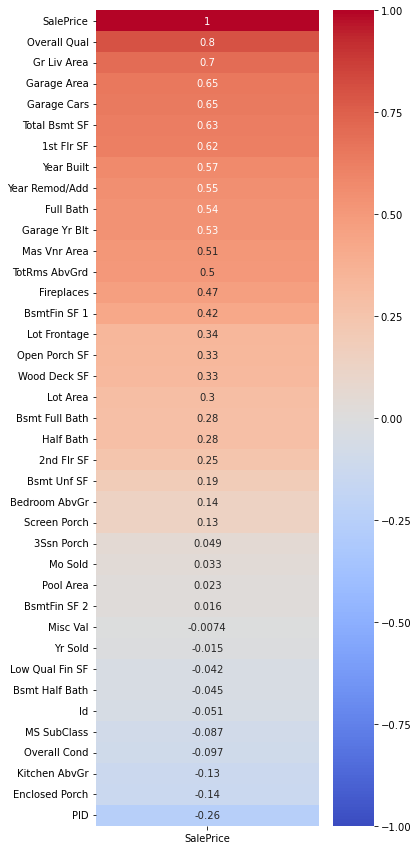

In [5]:
plt.figure(figsize = (5, 15))
sns.heatmap(df.corr()[['SalePrice']].sort_values('SalePrice', ascending = False), cmap = 'coolwarm', vmin = -1, vmax = 1, annot = True)

**Check for Null values and Corrupt Columns**

In [6]:
df._get_numeric_data().isnull().sum()

1st Flr SF           0
2nd Flr SF           0
3Ssn Porch           0
Bedroom AbvGr        0
Bsmt Full Bath       2
Bsmt Half Bath       2
Bsmt Unf SF          1
BsmtFin SF 1         1
BsmtFin SF 2         1
Enclosed Porch       0
Fireplaces           0
Full Bath            0
Garage Area          1
Garage Cars          1
Garage Yr Blt      114
Gr Liv Area          0
Half Bath            0
Id                   0
Kitchen AbvGr        0
Lot Area             0
Lot Frontage       330
Low Qual Fin SF      0
MS SubClass          0
Mas Vnr Area        22
Misc Val             0
Mo Sold              0
Open Porch SF        0
Overall Cond         0
Overall Qual         0
PID                  0
Pool Area            0
SalePrice            0
Screen Porch         0
TotRms AbvGrd        0
Total Bsmt SF        1
Wood Deck SF         0
Year Built           0
Year Remod/Add       0
Yr Sold              0
dtype: int64

In [7]:
df.select_dtypes(include=['object']).dtypes

Alley             object
Bldg Type         object
Bsmt Cond         object
Bsmt Exposure     object
Bsmt Qual         object
BsmtFin Type 1    object
BsmtFin Type 2    object
Central Air       object
Condition 1       object
Condition 2       object
Electrical        object
Exter Cond        object
Exter Qual        object
Exterior 1st      object
Exterior 2nd      object
Fence             object
Fireplace Qu      object
Foundation        object
Functional        object
Garage Cond       object
Garage Finish     object
Garage Qual       object
Garage Type       object
Heating           object
Heating QC        object
House Style       object
Kitchen Qual      object
Land Contour      object
Land Slope        object
Lot Config        object
Lot Shape         object
MS Zoning         object
Mas Vnr Type      object
Misc Feature      object
Neighborhood      object
Paved Drive       object
Pool QC           object
Roof Matl         object
Roof Style        object
Sale Type         object


In [8]:
#df['bsmt_cond_num'] = df['bsmt_cond'].map({'Ex': 6, 'Gd':5, 'TA': 4, 'Fa':3, 'Po':2, 'NA':1})
df['Neighborhood'].unique()

array(['Sawyer', 'SawyerW', 'NAmes', 'Timber', 'Edwards', 'OldTown',
       'BrDale', 'CollgCr', 'Somerst', 'Mitchel', 'StoneBr', 'NridgHt',
       'Gilbert', 'Crawfor', 'IDOTRR', 'NWAmes', 'Veenker', 'MeadowV',
       'SWISU', 'NoRidge', 'ClearCr', 'Blmngtn', 'BrkSide', 'NPkVill',
       'Blueste', 'GrnHill', 'Greens', 'Landmrk'], dtype=object)

In [9]:
df.shape

(2051, 81)

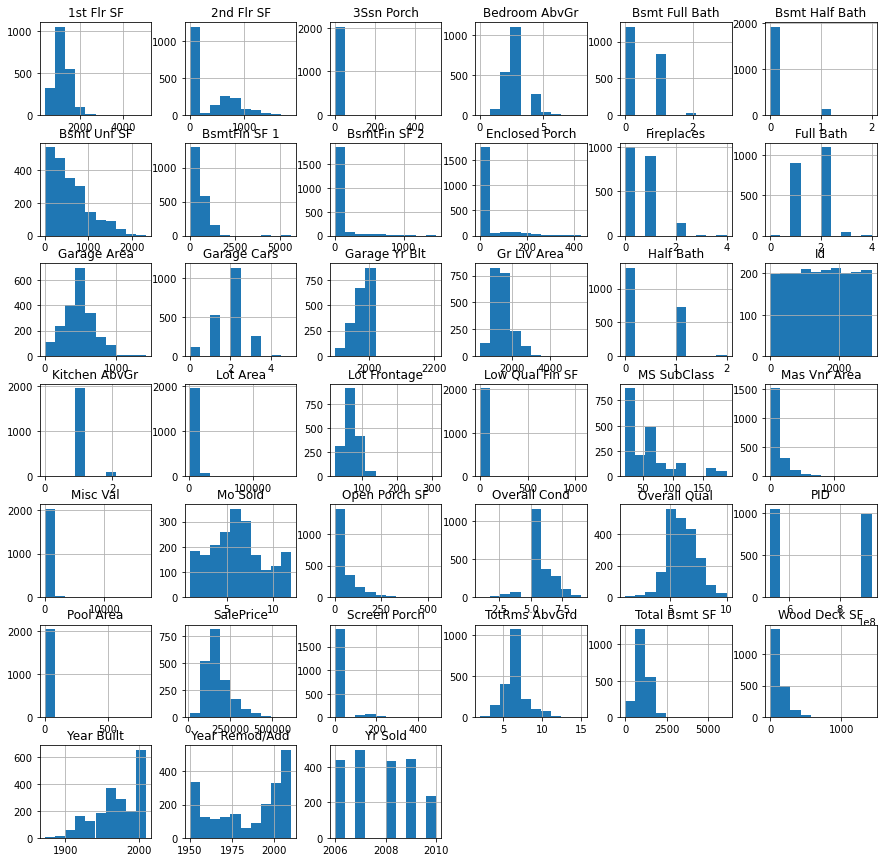

In [10]:
df.hist(figsize = (15, 15));

Of note is that the Sale Price histogram is slightly skewed right. I wonder if a power transformation would be effective here. 

In [11]:
# plt.figure(figsize=(10,5))
# sns.pairplot(df, x_vars=['SalePrice'])

<Figure size 720x360 with 0 Axes>

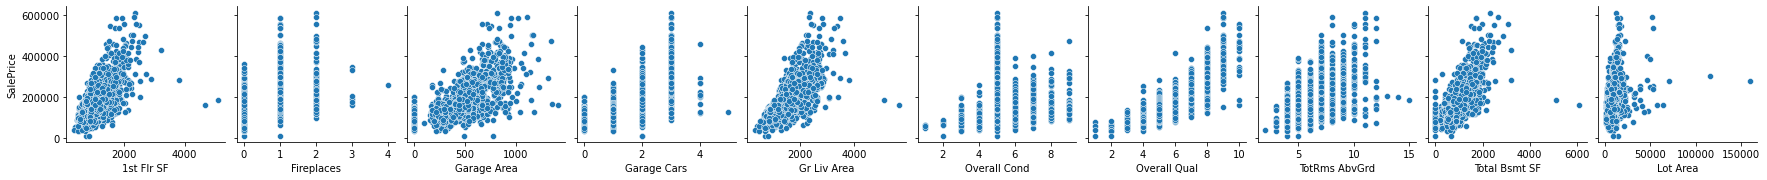

In [12]:
plt.figure(figsize=(10,5))
sns.pairplot(df, x_vars = ['1st Flr SF', 
                           'Fireplaces', 
                           'Garage Area', 
                           'Garage Cars', 
                           'Gr Liv Area', 
                           'Overall Cond', 
                           'Overall Qual', 
                           'TotRms AbvGrd', 
                           'Total Bsmt SF',
                          'Lot Area'],y_vars=['SalePrice'])

<AxesSubplot:>

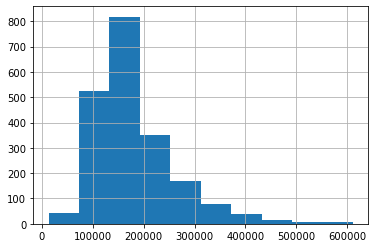

In [13]:
df['SalePrice'].hist()

<AxesSubplot:xlabel='SalePrice'>

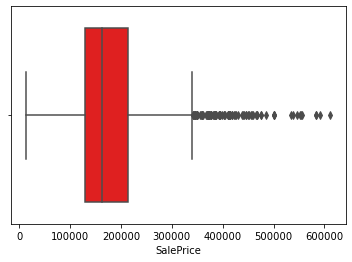

In [14]:
sns.boxplot(x=df['SalePrice'], color='r')
#Target is skewed right

**Feature Engineering**

In [15]:
df['Garage Area'].fillna(df['Garage Area'].median(), inplace = True)
df['Garage Cars'].fillna(df['Garage Cars'].median(), inplace = True)
df['Total Bsmt SF'].fillna(0, inplace=True)
df['Bsmt Qual'].fillna('NA', inplace=True)
df['Bsmt Cond'].fillna('NA', inplace=True)

df['Bsmt Qual Num'] = df['Bsmt Qual'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1, 'NA':0})
df['Bsmt Cond Num'] = df['Bsmt Cond'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1, 'NA':0})
df['Bsmt Num'] = df['Bsmt Cond Num'] * df['Bsmt Qual Num']

df['Exter Cond Num'] = df['Exter Cond'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1, 'NA':0})
df['Exter Qual Num'] = df['Exter Qual'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1, 'NA':0})
df['Exter Num'] = df['Exter Cond Num'] * df['Exter Qual Num']

df['Functional Num'] = df['Functional'].map({'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod':4, 'Maj1': 3, 'Maj2':2, 'Sev':1, 'Sal':0})

df['yr_remod_or_built'] = df['Year Remod/Add'] * df['Year Built']
df['Garage space'] = df['Garage Area'] * df['Garage Cars']
df['sqft_above'] = df['1st Flr SF'] * df['Gr Liv Area']
df['Overall Qual Gr Liv Area'] = df['Overall Qual'] * df['Gr Liv Area']
df['1st Flr and Total Bsmt sqft'] = df['1st Flr SF'] * df['Total Bsmt SF']
df['1st Flr Gr Liv Area Total Bsmt sqft'] = df['1st Flr SF'] * df['Total Bsmt SF'] * df['Gr Liv Area']

In [16]:
df['Bsmt Cond Num'].unique()

array([3, 4, 0, 2, 1, 5])

<Figure size 720x360 with 0 Axes>

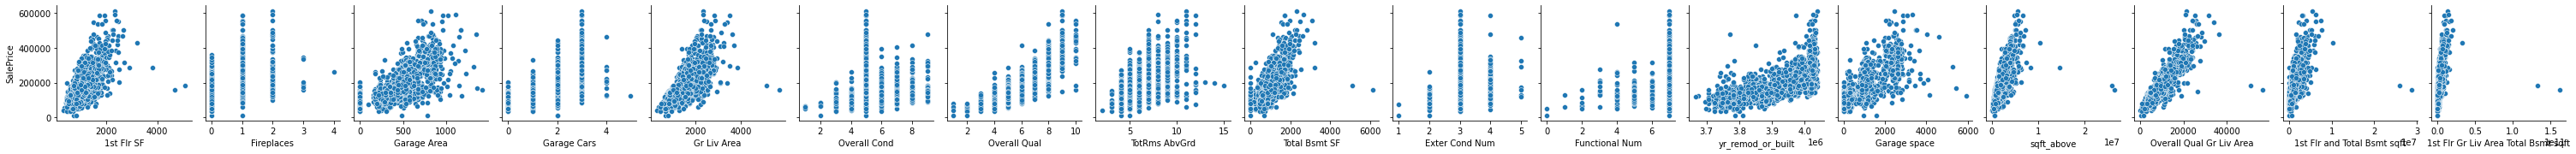

In [17]:
plt.figure(figsize=(10,5))
sns.pairplot(df, x_vars = ['1st Flr SF', 
                           'Fireplaces', 
                           'Garage Area', 
                           'Garage Cars', 
                           'Gr Liv Area', 
                           'Overall Cond', 
                           'Overall Qual', 
                           'TotRms AbvGrd', 
                           'Total Bsmt SF', 
                           'Exter Cond Num', 
                           'Functional Num', 
                           'yr_remod_or_built', 
                           'Garage space', 
                           'sqft_above', 
                           'Overall Qual Gr Liv Area', 
                           '1st Flr and Total Bsmt sqft', 
                           '1st Flr Gr Liv Area Total Bsmt sqft'],
             y_vars=['SalePrice'])

In [18]:
df.groupby("Neighborhood")['SalePrice'].mean().sort_values()

Neighborhood
MeadowV    100231.250000
IDOTRR     101103.188406
BrDale     103371.052632
OldTown    125276.300613
BrkSide    127022.697368
Edwards    130493.468531
SWISU      134758.875000
Landmrk    137000.000000
Sawyer     137181.909910
NPkVill    140476.470588
Blueste    144566.666667
NAmes      145905.816129
Mitchel    167656.707317
SawyerW    187760.160920
Greens     188666.666667
Gilbert    189228.387931
NWAmes     194619.022989
Blmngtn    200417.681818
CollgCr    202497.216667
Crawfor    205901.211268
ClearCr    217490.074074
Somerst    227183.900000
Timber     241051.354167
Veenker    253570.588235
GrnHill    280000.000000
NoRidge    316294.125000
NridgHt    322831.352459
StoneBr    329675.736842
Name: SalePrice, dtype: float64

I want to apply a score/ranking to the neighborhoods based on overall price. Those neighborhoods with the higher average sales price will receive a higher ranking. This will avoid a dummy column and also apply the location effect. 

In [19]:
Neighborhood_dict = {'MeadowV': 1, 
                     'IDOTRR': 2, 
                     'BrDale': 3, 
                     'OldTown': 4, 
                     'BrkSide': 5, 
                     'Edwards': 6, 
                     'SWISU': 7, 
                     'Landmrk': 8, 
                     'Sawyer': 9, 
                     'NPkVill': 10, 
                     'Blueste': 11, 
                     'NAmes': 12, 
                     'Mitchel': 13, 
                     'SawyerW': 14,
                     'Greens': 15, 
                     'Gilbert': 16, 
                     'NWAmes': 17, 
                     'Blmngtn': 18, 
                     'CollgCr': 19, 
                     'Crawfor': 20, 
                     'ClearCr': 21, 
                     'Somerst': 22,
                     'Timber': 23,
                     'Veenker': 24,
                     'GrnHill': 25,
                     'NoRidge': 26, 
                     'NridgHt': 27,
                     'StoneBr': 28
                    }

In [20]:
df['Neighborhood Rank'] = df['Neighborhood'].map(Neighborhood_dict)

<Figure size 720x360 with 0 Axes>

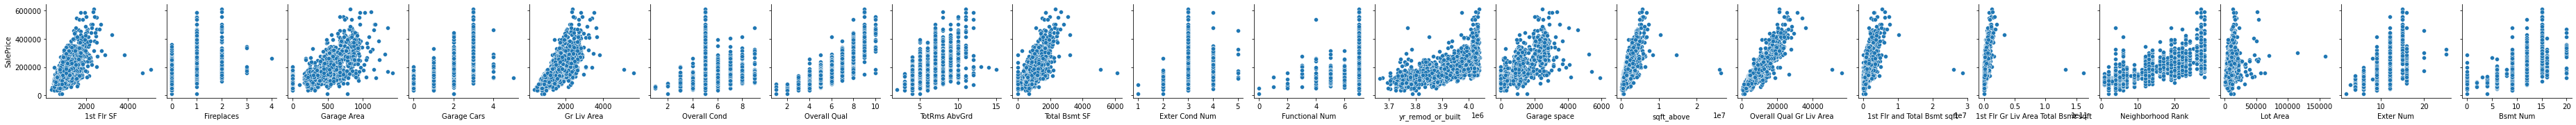

In [21]:
plt.figure(figsize=(10,5))
sns.pairplot(df, x_vars = ['1st Flr SF', 
                           'Fireplaces', 
                           'Garage Area', 
                           'Garage Cars', 
                           'Gr Liv Area', 
                           'Overall Cond', 
                           'Overall Qual', 
                           'TotRms AbvGrd', 
                           'Total Bsmt SF', 
                           'Exter Cond Num', 
                           'Functional Num', 
                           'yr_remod_or_built', 
                           'Garage space', 
                           'sqft_above', 
                           'Overall Qual Gr Liv Area', 
                           '1st Flr and Total Bsmt sqft', 
                           '1st Flr Gr Liv Area Total Bsmt sqft', 
                           'Neighborhood Rank', 
                           'Lot Area',
                          'Exter Num', 
                          'Bsmt Num'],
             y_vars=['SalePrice'])

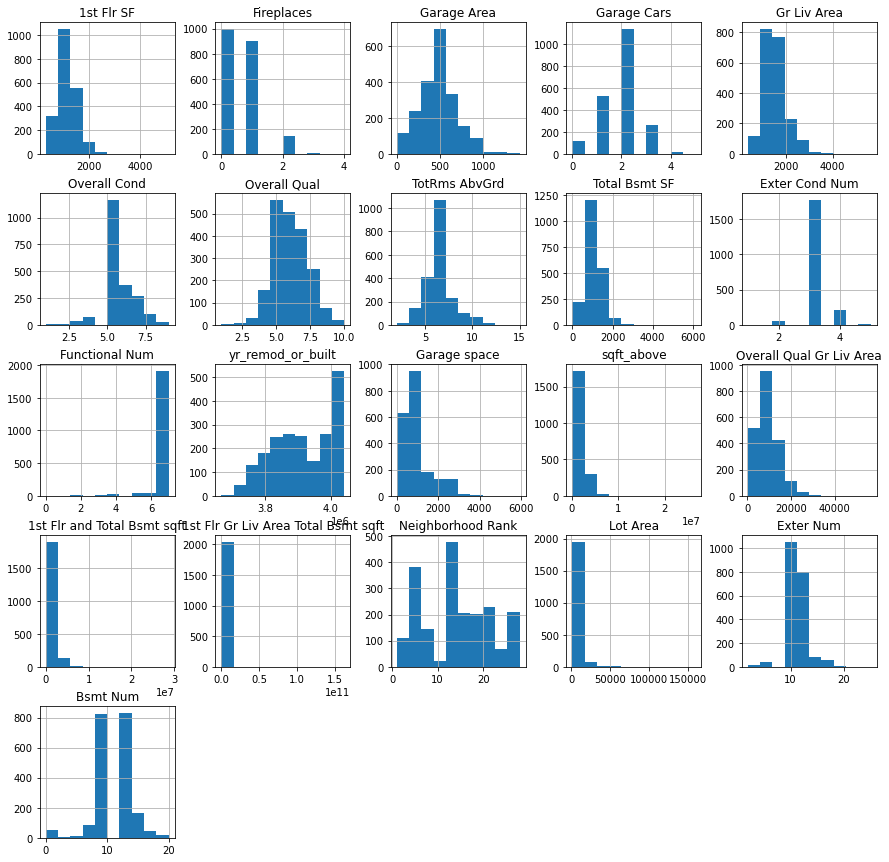

In [22]:
df.hist(column = ['1st Flr SF', 
                  'Fireplaces',
                  'Garage Area', 
                  'Garage Cars', 
                  'Gr Liv Area', 
                  'Overall Cond', 
                  'Overall Qual', 
                  'TotRms AbvGrd',
                  'Total Bsmt SF', 
                  'Exter Cond Num', 
                  'Functional Num', 
                  'yr_remod_or_built', 
                  'Garage space',
                  'sqft_above', 
                  'Overall Qual Gr Liv Area', 
                  '1st Flr and Total Bsmt sqft', 
                  '1st Flr Gr Liv Area Total Bsmt sqft', 
                  'Neighborhood Rank', 
                 'Lot Area', 
                 'Exter Num', 
                 'Bsmt Num'], figsize = (15, 15));

In [23]:
# df = pd.get_dummies(df, columns=['Condition 1'], drop_first=True)
# cond1_dum = [col for col in df.columns if 'Condition 1' in col]

In [24]:
# plt.figure(figsize=(10,5))
# sns.pairplot(df, x_vars = cond1_dum,
#              y_vars=['SalePrice'])

Looking at these scatter plots, those homes that are closer toa railroad are priced lower. I think I will map scores to these attributes.

In [25]:
df['Condition 1'].unique()

array(['RRAe', 'Norm', 'PosA', 'Artery', 'Feedr', 'PosN', 'RRAn', 'RRNe',
       'RRNn'], dtype=object)

In [26]:
Cond1_dict = {'Artery': 1,
              'Feedr': 1,
              'Norm': 2,
              'RRNn': 1,
              'RRAn': 1, 
              'PosN': 3,
              'PosA': 3, 
              'RRNe': 1,
              'RRAe': 1
             }

In [27]:
df['Cond1 Rank'] = df['Condition 1'].map(Cond1_dict)
df['Cond2 Rank'] = df['Condition 2'].map(Cond1_dict)
df['Condition Rank'] = df['Cond1 Rank'] * df['Cond2 Rank']

<Figure size 720x360 with 0 Axes>

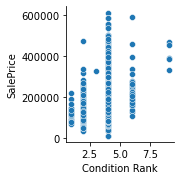

In [28]:
plt.figure(figsize=(10,5))
sns.pairplot(df, x_vars = ['Condition Rank'],
              y_vars=['SalePrice'])

Interested in the following features to start with:
- 1st Flr Gr Liv Area Total Bsmt sqft (Interaction)
- Overall Qual
- Overall Qual Gr Liv Area (Interaction)
- TotRms AbvGrd
- Neighborhood Rank
- Garage space (Interaction)
- yr_remod_or_built (Interaction)
- Functional Num 
- Fireplaces
- Exter Cond Num (Interaction)
- Lot Area
- Condition Rank (Interaction)
- Exter Num (Interaction)
- Bsmt Num (Interaction)

Also going to try a log transformation of the SalePrice

In [29]:
df['1st Flr Gr Liv Area Total Bsmt sqft'].unique()

array([7.77399375e+08, 1.76883342e+09, 1.18093219e+09, ...,
       5.62559386e+09, 2.00886426e+09, 1.84338493e+09])

**Feature Engineering and cleaning for test file**

In [30]:
df_test['Garage Area'].fillna(df_test['Garage Area'].median(), inplace = True)
df_test['Garage Cars'].fillna(df_test['Garage Cars'].median(), inplace = True)
df_test['Total Bsmt SF'].fillna(0, inplace=True)
df_test['Bsmt Qual'].fillna('NA', inplace=True)
df_test['Bsmt Cond'].fillna('NA', inplace=True)

df_test['Bsmt Qual Num'] = df_test['Bsmt Qual'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1, 'NA':0})
df_test['Bsmt Cond Num'] = df_test['Bsmt Cond'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1, 'NA':0})
df_test['Bsmt Num'] = df_test['Bsmt Cond Num'] * df_test['Bsmt Qual Num']

df_test['Exter Cond Num'] = df_test['Exter Cond'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1, 'NA':0})
df_test['Exter Qual Num'] = df_test['Exter Qual'].map({'Ex': 5, 'Gd':4, 'TA': 3, 'Fa':2, 'Po':1, 'NA':0})
df_test['Exter Num'] = df_test['Exter Cond Num'] * df_test['Exter Qual Num']

df_test['Functional Num'] = df_test['Functional'].map({'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod':4, 'Maj1': 3, 'Maj2':2, 'Sev':1, 'Sal':0})

df_test['yr_remod_or_built'] = df_test['Year Remod/Add'] * df_test['Year Built']
df_test['Garage space'] = df_test['Garage Area'] * df_test['Garage Cars']
df_test['sqft_above'] = df_test['1st Flr SF'] * df_test['Gr Liv Area']
df_test['Overall Qual Gr Liv Area'] = df_test['Overall Qual'] * df_test['Gr Liv Area']
df_test['1st Flr and Total Bsmt sqft'] = df_test['1st Flr SF'] * df_test['Total Bsmt SF']

df_test['Neighborhood Rank'] = df_test['Neighborhood'].map(Neighborhood_dict)

df_test['Cond1 Rank'] = df_test['Condition 1'].map(Cond1_dict)
df_test['Cond2 Rank'] = df_test['Condition 2'].map(Cond1_dict)
df_test['Condition Rank'] = df_test['Cond1 Rank'] * df_test['Cond2 Rank']

df_test['Overall Qual Gr Liv Area'] = df_test['Overall Qual Gr Liv Area'].map(np.log)

**Features**

In [31]:
df['Overall Qual Gr Liv Area'] = df['Overall Qual Gr Liv Area'].map(np.log)

In [32]:
features = ['Overall Qual', 
            'Overall Qual Gr Liv Area', 
            'TotRms AbvGrd',
            'Neighborhood Rank', 
            'Garage space', 
            'yr_remod_or_built', 
            'Functional Num', 
            'Fireplaces', 
            'Exter Cond Num', 
            'Lot Area', 
            'Condition Rank',
            'Exter Num', 
            'Bsmt Num']
X = df[features]
y = df['SalePrice']

In [33]:
lr = LinearRegression()

In [34]:
cross_val_score(lr, X, y).mean()

0.811558097870166

**Model Prep: Train/Test Split**

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 36)

In [36]:
y_train_log = y_train.map(np.log)
y_test_log = y_test.map(np.log)

In [37]:
cross_val_score(lr, X_train, y_train_log).mean()

0.865123088178466

**Fitting Model and Scoring**

In [38]:
lr.fit(X_train, y_train_log)

LinearRegression()

In [39]:
lr.score(X_train, y_train_log)

0.8697041978726667

In [40]:
lr.score(X_test, y_test_log)

0.8527395842689433

In [41]:
cross_val_score(lr, X_train, y_train_log).mean()

0.865123088178466

Great in terms of low variance and farily good on bias. 

**Residuals**

In [42]:
pred = lr.predict(X_test)

In [43]:
residuals = y_test_log - pred

<AxesSubplot:>

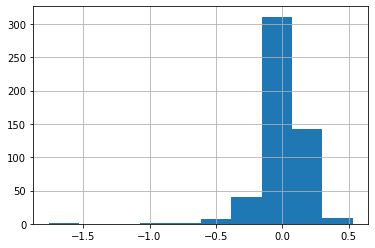

In [44]:
residuals.hist()

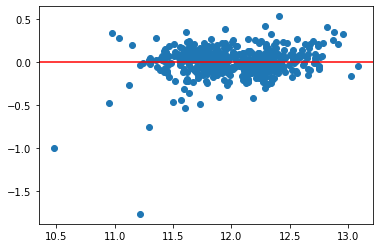

In [45]:
plt.scatter(pred, residuals)
plt.axhline(y = 0, color = 'r');

In [46]:
pred_sale = np.exp(pred)

In [47]:
r2_score(y_test, pred_sale)

0.8700360779183436

**Set up Submission file for Kaggle.**

In [48]:
pred_test = lr.predict(df_test[features])

In [49]:
pred_test.shape

(878,)

In [50]:
df_test['SalePrice'] = np.exp(pred_test)

In [51]:
model12_submission = df_test[['Id', 'SalePrice']]
model12_submission.head()

,Id,SalePrice
0,2658,127548.133218
1,2718,160669.691852
2,2414,219534.335781
3,1989,115864.216964
4,625,174480.630817


In [52]:
model12_submission.set_index('Id', inplace=True) 

In [53]:
model12_submission.to_csv('../datasets/Model_submissions/model12_submission.csv') 